In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df=pd.read_csv('Employee.csv')
df

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


In [18]:
#statistical analysis and renaming of the columns.
df.describe()

,Age,Salary,Gender
count,130.000000,124.000000,148.000000
mean,30.484615,5312.467742,0.222973
std,11.096640,2573.764683,0.417654
min,0.000000,1089.000000,0.000000
25%,22.000000,3030.000000,0.000000
50%,32.500000,5000.000000,0.000000
75%,37.750000,8000.000000,0.000000
max,54.000000,9876.000000,1.000000


In [19]:
# List unique values and their lengths for each feature
df.nunique()

Company     6
Age        29
Salary     40
Place      11
Country     1
Gender      2
dtype: int64

In [20]:
#Find the missing and inappropriate values, treat them appropriately. Remove allduplicate rows. Find the outliers.Replace the value 0 in age as NaN
df['Age'].replace(0, float('nan'), inplace=True)

In [25]:
df.iloc[6]

Company        TCS
Age            NaN
Salary      6000.0
Place      Chennai
Country      India
Gender           1
Name: 6, dtype: object

In [27]:
#Treat the null values in all columns using any measuresand  replacing  the values with mean/median/mode

df.fillna({'Salary': df['Salary'].mean(), 'Place': df['Place'].mode()[0], 'Country': df['Country'].mode()[0], 
           'Gender': df['Gender'].mode()[0]})

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,5312.467742,Chennai,India,0
1,Infosys,30.0,5312.467742,Mumbai,India,0
2,TCS,35.0,2300.000000,Calcutta,India,0
3,Infosys,40.0,3000.000000,Delhi,India,0
4,TCS,23.0,4000.000000,Mumbai,India,0
...,...,...,...,...,...,...
143,TCS,33.0,9024.000000,Calcutta,India,1
144,Infosys,22.0,8787.000000,Calcutta,India,1
145,Infosys,44.0,4034.000000,Delhi,India,1
146,TCS,33.0,5034.000000,Mumbai,India,1


In [28]:
#Remove all duplicate rows.
df.drop_duplicates(inplace=True)
df

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
142,Infosys Pvt Lmt,22.0,8202.0,Mumbai,India,0
143,TCS,33.0,9024.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


In [29]:
#Find the outliers in age & salary using z score method
#age
m = df.Age.mean()
s = df.Age.std()
m,s

(32.04132231404959, 8.98924977794298)

In [30]:
#z score 
df['zscore'] = (df.Age-m)/s
df

,Company,Age,Salary,Place,Country,Gender,zscore
0,TCS,20.0,NaN,Chennai,India,0,-1.339525
1,Infosys,30.0,NaN,Mumbai,India,0,-0.227085
2,TCS,35.0,2300.0,Calcutta,India,0,0.329135
3,Infosys,40.0,3000.0,Delhi,India,0,0.885355
4,TCS,23.0,4000.0,Mumbai,India,0,-1.005793
...,...,...,...,...,...,...,...
142,Infosys Pvt Lmt,22.0,8202.0,Mumbai,India,0,-1.117037
143,TCS,33.0,9024.0,Calcutta,India,1,0.106647
145,Infosys,44.0,4034.0,Delhi,India,1,1.330331
146,TCS,33.0,5034.0,Mumbai,India,1,0.106647


In [31]:
max_z= df['zscore'].max()
min_z= df['zscore'].min()
max_z, min_z

(2.4427708906065395, -1.6732566883341748)

In [32]:
#salary
m1 = df.Salary.mean()
s1 = df.Salary.std()
m1,s1

(5283.471074380165, 2585.373599934769)

In [33]:
df['zscore'] = (df.Salary-m1)/s1
df

,Company,Age,Salary,Place,Country,Gender,zscore
0,TCS,20.0,NaN,Chennai,India,0,NaN
1,Infosys,30.0,NaN,Mumbai,India,0,NaN
2,TCS,35.0,2300.0,Calcutta,India,0,-1.153981
3,Infosys,40.0,3000.0,Delhi,India,0,-0.883227
4,TCS,23.0,4000.0,Mumbai,India,0,-0.496435
...,...,...,...,...,...,...,...
142,Infosys Pvt Lmt,22.0,8202.0,Mumbai,India,0,1.128862
143,TCS,33.0,9024.0,Calcutta,India,1,1.446804
145,Infosys,44.0,4034.0,Delhi,India,1,-0.483285
146,TCS,33.0,5034.0,Mumbai,India,1,-0.096493


In [34]:
max_z_salary= df['zscore'].max()
min_z_salary= df['zscore'].min()
max_z_salary, min_z_salary

(1.7763502055314975, -1.6223848941932395)

### Data_Analysis


In [39]:
#Filter the data with age >40 and salary<5000
fltr= df[(df['Age']>40)&(df['Salary']<5000)]
fltr

,Company,Age,Salary,Place,Country,Gender,zscore
21,Infosys,50.0,3184.0,Delhi,India,0,-0.812057
32,Infosys,45.0,4034.0,Calcutta,India,0,-0.483285
39,Infosys,41.0,3000.0,Mumbai,India,0,-0.883227
50,Infosys,41.0,3000.0,Chennai,India,0,-0.883227
57,Infosys,51.0,3184.0,Hyderabad,India,0,-0.812057
68,Infosys,43.0,4034.0,Mumbai,India,0,-0.483285
75,Infosys,44.0,3000.0,Cochin,India,0,-0.883227
86,Infosys,41.0,3000.0,Delhi,India,0,-0.883227
93,Infosys,54.0,3184.0,Mumbai,India,0,-0.812057
104,Infosys,44.0,4034.0,Delhi,India,0,-0.483285


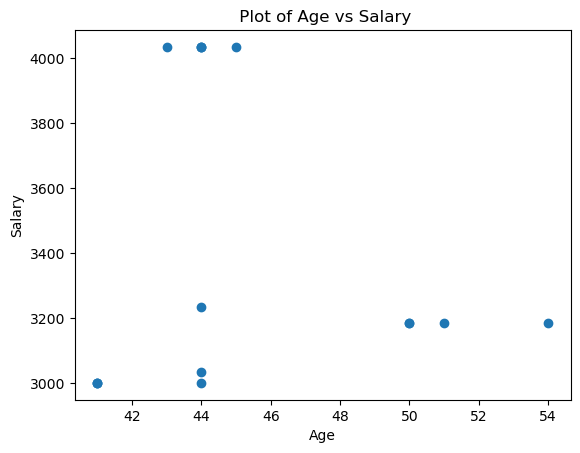

In [41]:
#Plot the chart with age and salary
plt.scatter(fltr['Age'],fltr['Salary'])
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title(' Plot of Age vs Salary')
plt.show()

### Data Encoding

In [42]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [43]:
df

,Company,Age,Salary,Place,Country,Gender,zscore
0,TCS,20.0,NaN,Chennai,India,0,NaN
1,Infosys,30.0,NaN,Mumbai,India,0,NaN
2,TCS,35.0,2300.0,Calcutta,India,0,-1.153981
3,Infosys,40.0,3000.0,Delhi,India,0,-0.883227
4,TCS,23.0,4000.0,Mumbai,India,0,-0.496435
...,...,...,...,...,...,...,...
142,Infosys Pvt Lmt,22.0,8202.0,Mumbai,India,0,1.128862
143,TCS,33.0,9024.0,Calcutta,India,1,1.446804
145,Infosys,44.0,4034.0,Delhi,India,1,-0.483285
146,TCS,33.0,5034.0,Mumbai,India,1,-0.096493


In [44]:
df_one_hot_encoded = pd.get_dummies(data = df, columns = ["Place", "Country"])

df_one_hot_encoded

,Company,Age,Salary,Gender,zscore,Place_Bhopal,Place_Calcutta,Place_Chennai,Place_Cochin,Place_Delhi,Place_Hyderabad,Place_Mumbai,Place_Nagpur,Place_Noida,Place_Podicherry,Place_Pune,Country_India
0,TCS,20.0,NaN,0,NaN,False,False,True,False,False,False,False,False,False,False,False,True
1,Infosys,30.0,NaN,0,NaN,False,False,False,False,False,False,True,False,False,False,False,True
2,TCS,35.0,2300.0,0,-1.153981,False,True,False,False,False,False,False,False,False,False,False,True
3,Infosys,40.0,3000.0,0,-0.883227,False,False,False,False,True,False,False,False,False,False,False,True
4,TCS,23.0,4000.0,0,-0.496435,False,False,False,False,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,Infosys Pvt Lmt,22.0,8202.0,0,1.128862,False,False,False,False,False,False,True,False,False,False,False,True
143,TCS,33.0,9024.0,1,1.446804,False,True,False,False,False,False,False,False,False,False,False,True
145,Infosys,44.0,4034.0,1,-0.483285,False,False,False,False,True,False,False,False,False,False,False,True
146,TCS,33.0,5034.0,1,-0.096493,False,False,False,False,False,False,True,False,False,False,False,True


In [45]:
from sklearn.preprocessing import OneHotEncoder

cols_to_encode = ["Place", "Country"]
new_encoded_cols_names = []

# Create a list of new column names
for col in cols_to_encode:
    new_encoded_cols_names += [f"is_{category}" for category in df[col].unique().tolist()]

new_encoded_cols_names

# Initialize and fit the OneHotEncoder class from sklearn
one_hot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Fit and transform the selected columns
encoded_cols = one_hot_encoder.fit_transform(df[cols_to_encode])

# As the output of the above transformer would be a sparse matrix, we need to convert it back to a Pandas DataFrame
df_encoded = pd.DataFrame(encoded_cols, columns=new_encoded_cols_names)

# Join the new DataFrame with the original DataFrame
df_one_hot_encoded = df.join(df_encoded)
df_one_hot_encoded

,Company,Age,Salary,Place,Country,Gender,zscore,is_Chennai,is_Mumbai,is_Calcutta,is_Delhi,is_Podicherry,is_Cochin,is_nan,is_Noida,is_Hyderabad,is_Bhopal,is_Nagpur,is_Pune,is_India
0,TCS,20.0,NaN,Chennai,India,0,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Infosys,30.0,NaN,Mumbai,India,0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,TCS,35.0,2300.0,Calcutta,India,0,-1.153981,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,Infosys,40.0,3000.0,Delhi,India,0,-0.883227,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,TCS,23.0,4000.0,Mumbai,India,0,-0.496435,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,Infosys Pvt Lmt,22.0,8202.0,Mumbai,India,0,1.128862,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
143,TCS,33.0,9024.0,Calcutta,India,1,1.446804,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
145,Infosys,44.0,4034.0,Delhi,India,1,-0.483285,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
146,TCS,33.0,5034.0,Mumbai,India,1,-0.096493,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for i in df:
    df[i] = label_encoder.fit_transform(df[i])

In [47]:
df

,Company,Age,Salary,Place,Country,Gender,zscore
0,4,3,40,2,0,0,40
1,2,10,40,6,0,0,40
2,4,15,3,1,0,0,3
3,2,19,5,4,0,0,5
4,4,6,12,6,0,0,12
...,...,...,...,...,...,...,...
142,3,5,32,6,0,0,32
143,4,13,37,1,0,1,37
145,2,22,13,4,0,1,13
146,4,13,19,6,0,1,19


### Feature Scaling

In [48]:
#standard scaler
# Create a scaler object
scaler = StandardScaler()

# Fit the scaler on the data
scaler.fit(df)

# Transform the data
scaled_data = scaler.transform(df)


scaled_data

array([[ 0.83743579, -1.42727641,  1.29184939, ...,  0.        ,
        -0.53452248,  1.29184939],
       [-0.27914526, -0.59853527,  1.29184939, ...,  0.        ,
        -0.53452248,  1.29184939],
       [ 0.83743579, -0.00657731, -1.36464368, ...,  0.        ,
        -0.53452248, -1.36464368],
       ...,
       [-0.27914526,  0.82216383, -0.64667258, ...,  0.        ,
         1.87082869, -0.64667258],
       [ 0.83743579, -0.24336049, -0.21588992, ...,  0.        ,
         1.87082869, -0.21588992],
       [-0.27914526, -1.19049323,  0.71747251, ...,  0.        ,
        -0.53452248,  0.71747251]])

In [49]:
#minmaxscaler

# Create a scaler object
scaler = MinMaxScaler()

# Fit the scaler on the data
scaler.fit(df)

# Transform the data
scaled_data = scaler.transform(df)

scaled_data

array([[0.66666667, 0.10714286, 1.        , ..., 0.        , 0.        ,
        1.        ],
       [0.33333333, 0.35714286, 1.        , ..., 0.        , 0.        ,
        1.        ],
       [0.66666667, 0.53571429, 0.075     , ..., 0.        , 0.        ,
        0.075     ],
       ...,
       [0.33333333, 0.78571429, 0.325     , ..., 0.        , 1.        ,
        0.325     ],
       [0.66666667, 0.46428571, 0.475     , ..., 0.        , 1.        ,
        0.475     ],
       [0.33333333, 0.17857143, 0.8       , ..., 0.        , 0.        ,
        0.8       ]])